# IOD_Capstone_Project_2

# Introduction

The project aims to encapsulate all the knowledge obtained from the course and apply them.

We obtained the dataset from the Kaggle competition site. The original dataset was claimed to be procured directly from a sizeable Ecuadorian-based grocery retailer called Corporación Favorita. Therefore, the dataset was obtained from a reliable source. Note: Ecuador is an oil-dependent economy. Oil remains a crucial driver of Ecuador's GDP output.

The Support Vector Machine (baseline model) and Random Forest Classifier (advance model) are the models we choose to conduct our analysis.

Business question: Will the price of oil influence the level of monthly grocery consumption in Ecuador?

Data question: How can we determine monthly consumption by incorporating machine learning algorithms?

The columns within the dataset provided us are store number (each store is allocated a number), family (type of product), Sales (number of sales achieved in each store --> we are trying to predict Sales), onpromotion (number of promotions per item for each store. 

Kaggle provided the primary and test dataset. The oil.csv file contains oil prices for both the test and train datasets. The last 11 rows of the oil.csv dataset were allocated as our test dataset for the oil price.

In [1]:
#import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import *
import seaborn as sns
sns.set(style = 'ticks')
from sklearn.naive_bayes import GaussianNB

# Read The Dataset

We then import the oil pirce, sales train and test datasets.

In [2]:
Store_train = pd.read_csv('Store_train.csv')

In [3]:
Store_test = pd.read_csv('Store_test.csv')

In [4]:
Oil = pd.read_csv('oil.csv')

# Step 1. Exploratory Data Analysis

Explaratory data analysis process explores and selects the important features called feature selelction. We also incoporate data cleaning in our explorartory data analysis. Data cleaning involves discarding null values and dupplicates.

In [5]:
Store_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
Store_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
Oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
Store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
Store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


The code below renames the title of each column.

In [10]:
Store_train = Store_train.rename(columns={"store_nbr":"Store_Number"})
Store_train = Store_train.rename(columns={"family":"Type_Of_Product"})
Store_train = Store_train.rename(columns={"sales":"Sales"})
Store_train = Store_train.rename(columns={"onpromotion":"On_Promotion"})

We also rename the single column name from "dcoilwtico" to Oil_Price.

In [11]:
Oil = Oil.rename(columns={"dcoilwtico":"Oil_Price"})

The code below aims to 'filter' out all negative values (less than zero) from our Store_train dataset.

In [12]:
Store_train = Store_train[Store_train['Sales'] > 0]

In [13]:
Store_train.shape# Store_train dataset has 5 columns and over 2000000 rows.

(2061758, 6)

In [14]:
Store_test.shape

(28512, 5)

The code line below selects 50000 random data rows from the dataset. Our dataset has more than 2000000 rows of data. We need to choose a small sample size of 50000 because our python notebook will not be able to process all two million rows of data. 

In [15]:
Store_train = Store_train.sample(50000, random_state = 10)#Obtain random sample of data.

In [16]:
Store_train.isnull().sum()#Check for null values.

id                 0
date               0
Store_Number       0
Type_Of_Product    0
Sales              0
On_Promotion       0
dtype: int64

In [17]:
Store_train.nunique() #Shows the number of individual values for each variable.

id                 50000
date                1682
Store_Number          54
Type_Of_Product       33
Sales              15076
On_Promotion         207
dtype: int64

Next, our code below shows the correlations matrix between the sales_train variables. The correlation matrix aims to convey the correlation relationship between two variables. The correlation matrix plays a significant role in feature selection.

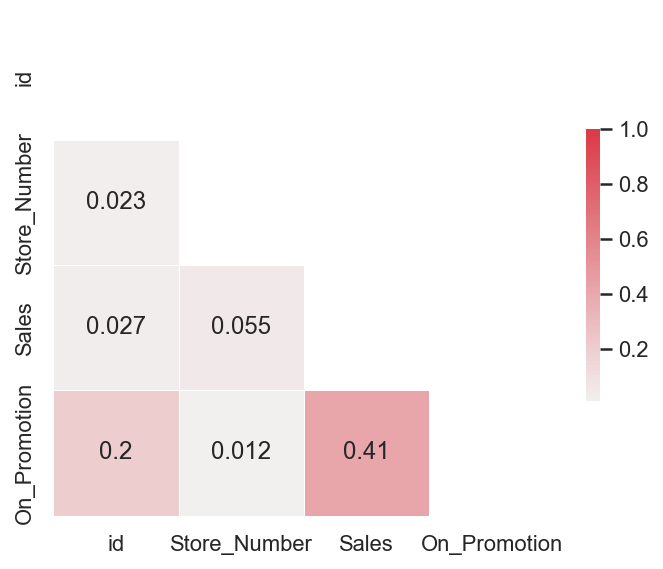

In [18]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(Store_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Store_train.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [19]:
Store_train.reset_index(drop = True, inplace = True)

We must search for 'outliers' within our dataset. We need to find outliers for Sales columns.

The code below searched for outliers within our dataset. We strongly believe that outliers can significantly impact our dataset by skewing the dataset left or right. Outliers can distort the dataset and our results. However, we decided to go with the outliers in our dataset.

In [20]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)] | (x > ceiling))
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

Value positioned from 0 to 25% and 75% to 100% are considered outliers.

In [21]:
tuckey_indices, tuckey_values = find_outliers_tukey(Store_train['Sales'])
print(np.sort(tuckey_values))

[  943.   943.   943. ... 20478. 21001. 25852.]


In sales per day, values from 943 to 25852 are considered outliers.

Create Oil train dataset.

The first 1206 rows of Oil dataset contains the training data.

In [22]:
Oil_train = Oil.iloc[:1206]

Next, we merge the Oil_train and Store_train datasets together onto the date column.

In [23]:
store_train = pd.merge(Oil_train, Store_train, on = ('date'), how = 'left')

The calculated minimum and maximum value range is necessary because we aim to use binary classification to differentiate the number of sales.

In [24]:
def check_min_max(store_train):
    # Check min, max of each column.
    print(store_train.describe().T[['min', 'max']])

In [25]:
check_min_max(store_train)

                   min         max
Oil_Price       26.190      110.62
id            2101.000  3000819.00
Store_Number     1.000       54.00
Sales            0.294    16657.00
On_Promotion     0.000      646.00


The code line below aims to achieve a binary classification of the number of sales. We categorized the number of sales into numbers 0 and 1. The number of sales was between 0 to 70 is equal to zero. Number One represents sales from 70 to 150000.

In [26]:
Sales=pd.cut(store_train.Sales, bins=[-1,80,16000], labels=['0','1'])

In [27]:
store_train.insert(4,'Sale', Sales)# We insert the new Sales column into column 4 in our main store_train dataset.

In [28]:
store_train.dtypes

date                 object
Oil_Price           float64
id                  float64
Store_Number        float64
Sale               category
Type_Of_Product      object
Sales               float64
On_Promotion        float64
dtype: object

Below, this line of code converts the Sale column from categorical data type into numerical values. Machine learning algorithm models such as support vector machines and random forest classifiers can easily interpret the numerical value.

In [29]:
store_train["Sale"] = pd.to_numeric(store_train["Sale"])

Value_counts() code counts the number of values allocated to each Sale binary classification (0, 1). The number of values in each classification needs to be equal because both Support Vector Machine and Random Forest Classifier models cannot forecast sales with an imbalanced dataset. 

In [30]:
store_train['Sale'].value_counts()#The counts in each binary classification (0 and 1) must be equal.

0.0    18290
1.0    17465
Name: Sale, dtype: int64

In [31]:
store_train.head()

,date,Oil_Price,id,Store_Number,Sale,Type_Of_Product,Sales,On_Promotion
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,93.14,3144.0,47.0,1.0,DELI,1046.028,0.0
2,2013-01-02,93.14,2537.0,3.0,1.0,PREPARED FOODS,428.000,0.0
3,2013-01-02,93.14,3016.0,43.0,0.0,GROCERY II,9.000,0.0
4,2013-01-02,93.14,2154.0,2.0,1.0,DELI,303.875,0.0


We must check for null values for the new dataset. The new store_train dataset contains missing data points.

In [32]:
store_train.isnull().sum()

date                  0
Oil_Price          1122
id                    4
Store_Number          4
Sale                  5
Type_Of_Product       4
Sales                 4
On_Promotion          4
dtype: int64

In [33]:
store_train.dropna(axis = 0, inplace = True)# We now remove all null values from our store_train dataset.
store_train.shape

(34637, 8)

We remove duplicates from our dataset to increase the quality, reliability and accuracy levels.

In [34]:
store_train.drop_duplicates(inplace = True)
store_train.shape

(34637, 8)

Next, we convert Type_Of_Product (object) into categorical data. Each number will represent a product type. For example, electronics is represented by the number 19.

In [35]:
store_train.Type_Of_Product = pd.Categorical(store_train.Type_Of_Product)

In [36]:
store_train['Product_Type'] = store_train.Type_Of_Product.cat.codes

In [37]:
#Again we convert categoriral data type into numerical values for Product_Type column.
store_train["Product_Type"] = pd.to_numeric(store_train["Product_Type"])

In [38]:
#We discard the id, date, Types_Of_Products and Sales columns.
store_train = store_train.drop(['id','date','Type_Of_Product','Sales'], axis = 1)

In [39]:
store_train.corr()

,Oil_Price,Store_Number,Sale,On_Promotion,Product_Type
Oil_Price,1.000000,-0.015462,0.041875,-0.140610,-0.045736
Store_Number,-0.015462,1.000000,0.010584,0.014023,0.009085
Sale,0.041875,0.010584,1.000000,0.241950,-0.121619
On_Promotion,-0.140610,0.014023,0.241950,1.000000,-0.024751
Product_Type,-0.045736,0.009085,-0.121619,-0.024751,1.000000


The highest correlation coefficient in our dataset is between On_Promotion and Sale. The second highest correlation is between Oil Price and Sale.

In [40]:
store_train.head(40)

,Oil_Price,Store_Number,Sale,On_Promotion,Product_Type
1,93.14,47.0,1.0,0.0,9
2,93.14,3.0,1.0,0.0,29
3,93.14,43.0,0.0,0.0,13
4,93.14,2.0,1.0,0.0,9
5,93.14,26.0,1.0,0.0,9
6,93.14,24.0,1.0,0.0,11
7,93.14,18.0,0.0,0.0,22
8,93.14,45.0,1.0,0.0,11
9,93.14,41.0,1.0,0.0,12
10,93.14,54.0,0.0,0.0,0


# Step 2. Create Feature Vector

We set 'Sale' as our target column because we are trying to predict or forecast the number of sales per day. Our feature column is equal to all other columns other than 'Sale.' We attempt to predict the Sale amount through input from all other columns.

In [41]:
#Import more libraries into Notebook.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [42]:
target_column = 'Sale'
feature_column = [c for c in store_train.columns if c != target_column]

In [43]:
X = store_train[feature_column]
y = store_train[target_column]

# Step 3. Split and Train the dataset

We are spliting the dataset into test and train. By default, the dataset is split into 25% test and 75% train dataset.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

The SMOTE() code below attempts to balance the amount of 0 and 1 values in our binary classification.

In [45]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(26658, 4) (26658,)


# Step 4. Build the Support Vector Machine Model

The code below shows the architecture of the Support Vector Machine Model. We feed our dataset into the support vector machine model.

In [46]:
X = np.array(X_train)
y = np.array(y_train)

svc_model = SVC(kernel = 'linear', probability = True)

svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)

In [47]:
SVM_prob = svc_model.predict_proba(X_test)

In [48]:
print(y_pred[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
def show_summary_report(model, X_data, y_data):

    actual = y_data
    
    prediction = model.predict(X_data)
    

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 2, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    

    # ROC
    ax[1].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

# Step 5. Evaluate the Support Vector Machine Model

We evaluate the accuracy and performance of our Support Vector Machine model.

Accuracy : 0.6729 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8847 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3841 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6679                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


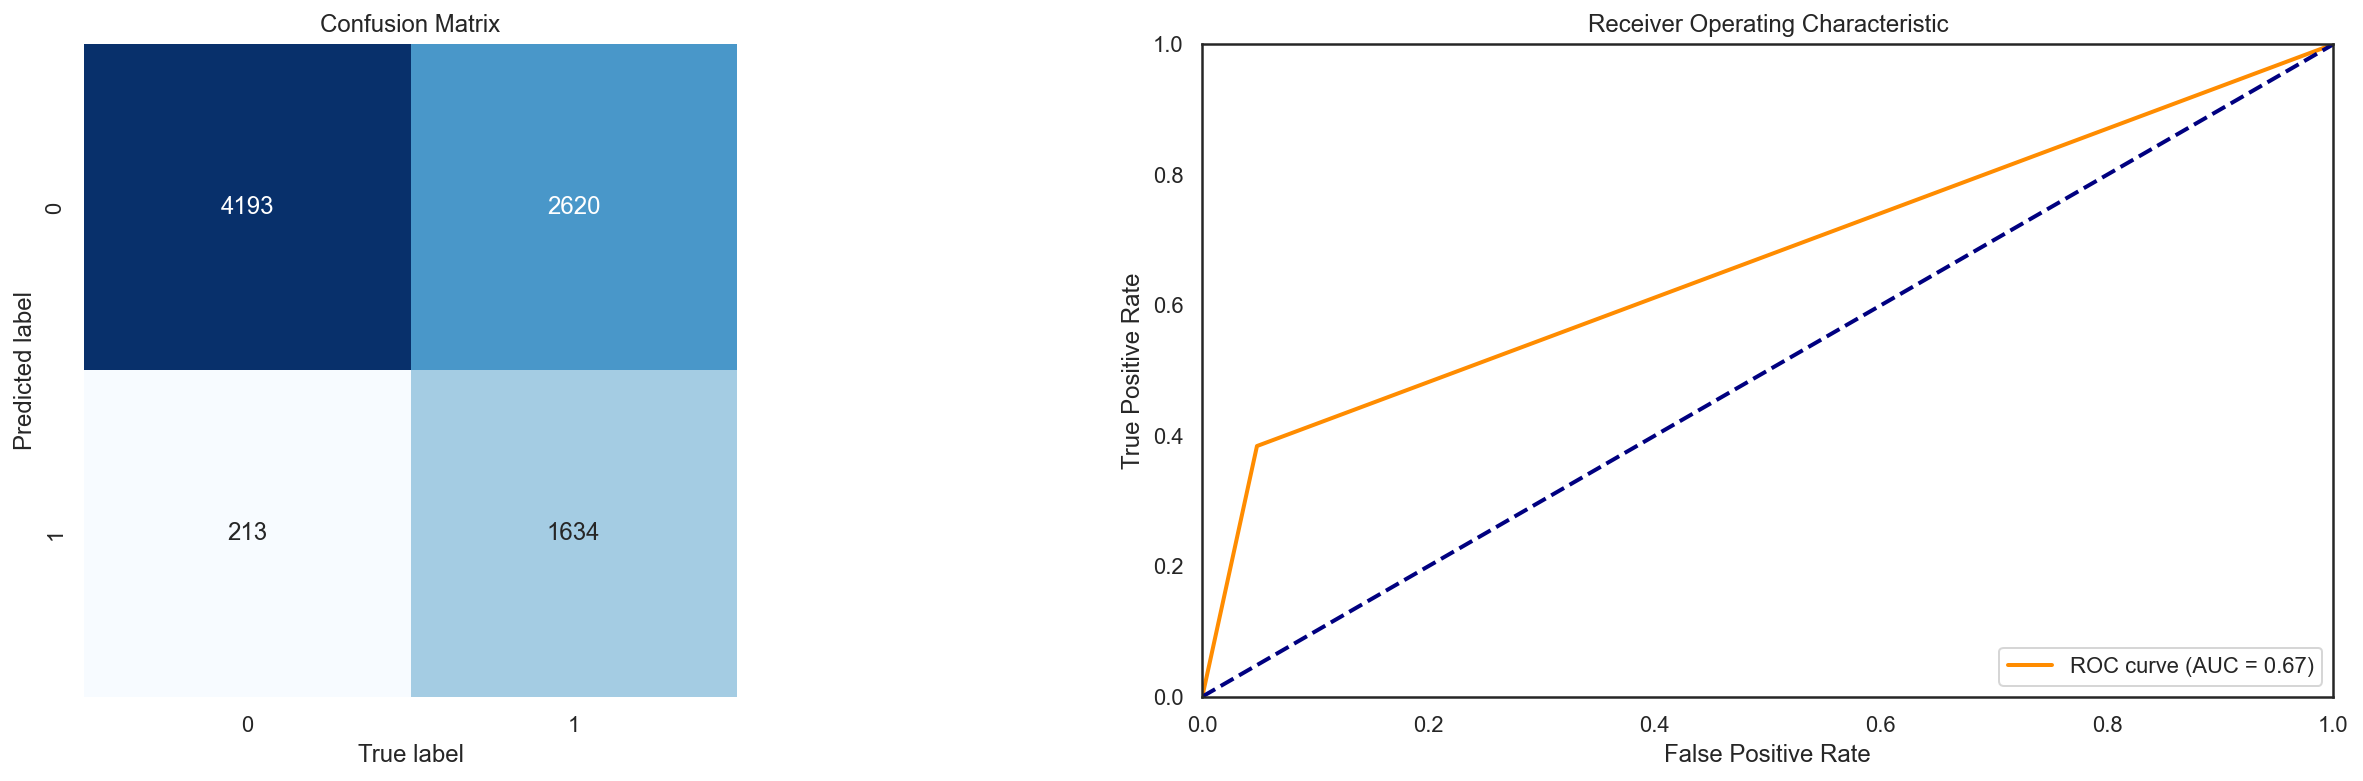

(0.6728637413394919, 0.8846778559826746, 0.384109073812882, 0.667882952703082)

In [50]:
show_summary_report(svc_model, X_data = X_test, y_data=y_test)

Accuracy : 0.6672 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8929 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3798 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6672                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


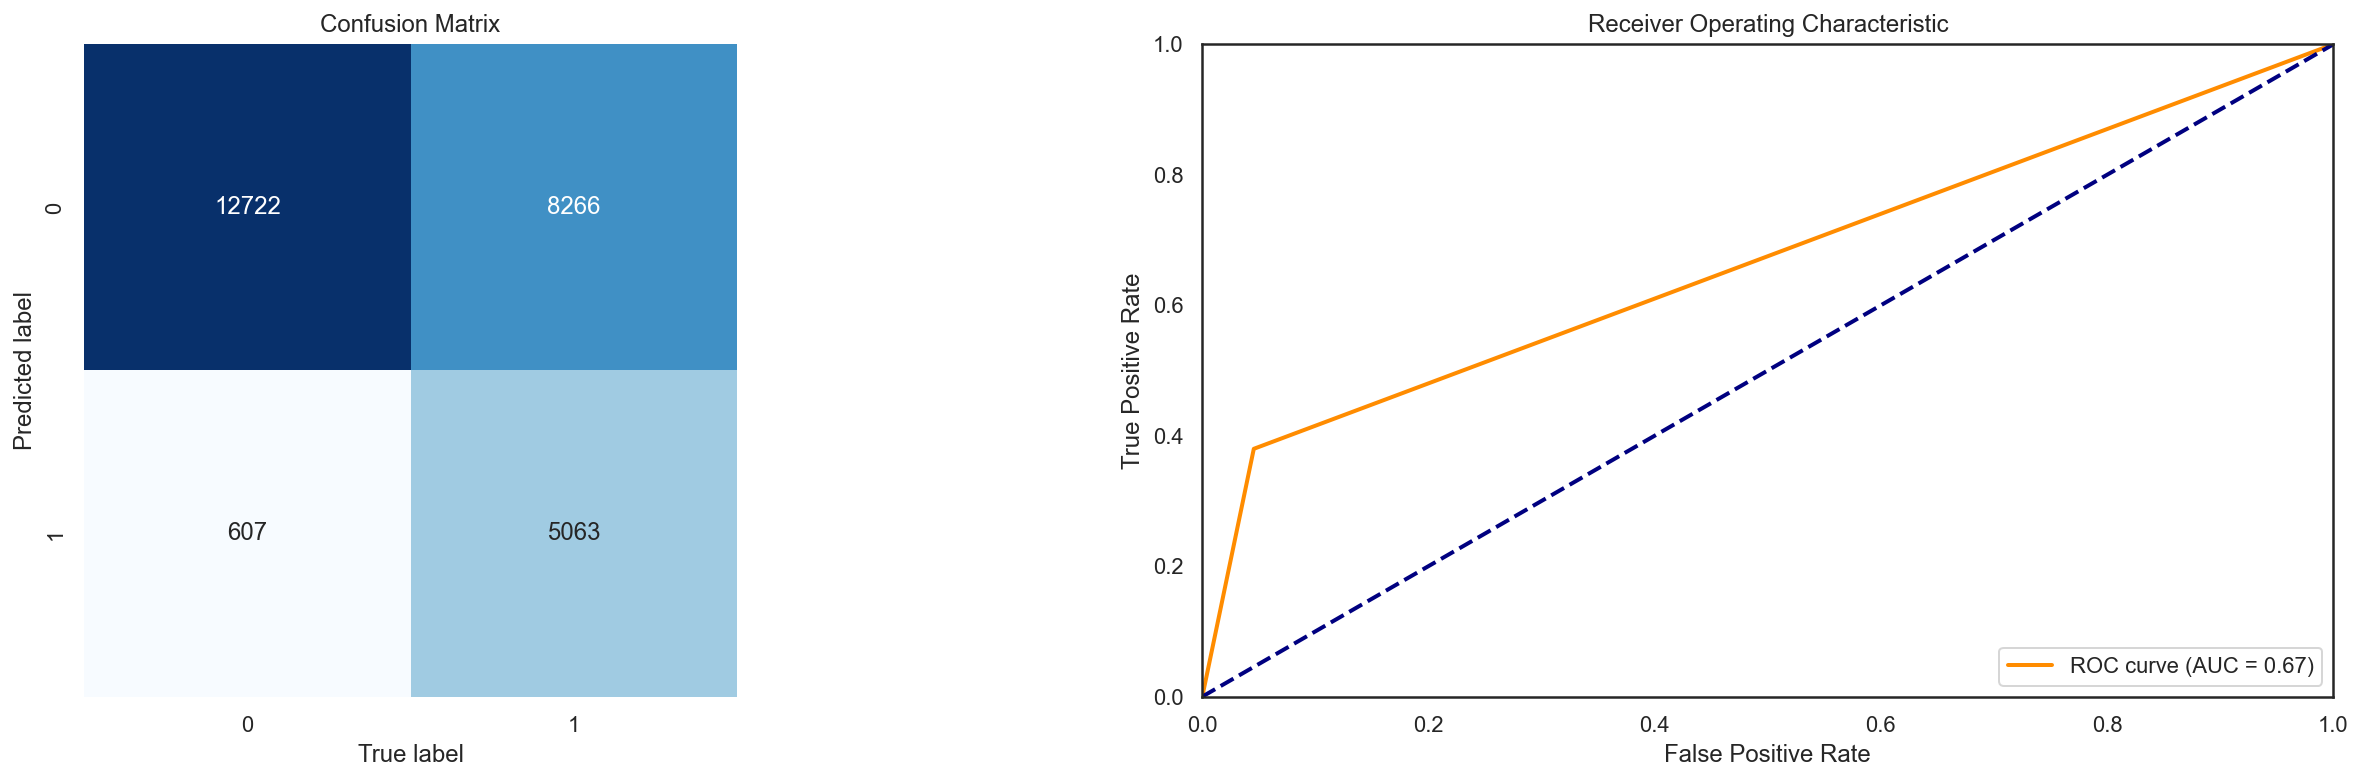

(0.6671543251556756,
 0.8929453262786596,
 0.3798484507464926,
 0.6671543251556755)

In [51]:
show_summary_report(svc_model, X_data = X_train, y_data=y_train)

In [52]:
svc_model.score(X_test, y_test)
#We aim to predict y value by using the X_test data.
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: ',accuracy)

Accuracy is:  0.6728637413394919


# Precision Scores of the Support Vector Machine Model

In [53]:
from sklearn.metrics import precision_score
y_true=y_test
pred=y_pred
precision_score(y_true, pred, average='macro')

0.7500594622640513

In [54]:
precision_score(y_true, pred, average='micro')

0.6728637413394919

In [55]:
precision_score(y_true, pred, average='weighted')

0.7476966451918537

In [56]:
precision_score(y_true, pred, average=None)

array([0.61544107, 0.88467786])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Confusion Matrix.
bm_map = {
    'B': 0,
    'M': 1
}

store_train['Sale'] = store_train['Sale'].map(bm_map)

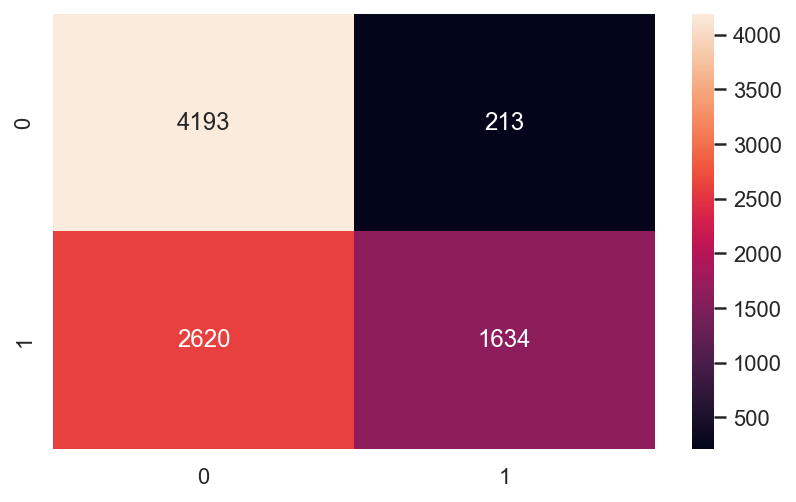

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");

The image above show the confusion matrix of Support Vector Machine Model, which contains the type I and type II errors.

# Step 6. Build the Random Forest Classifier Model

The code below shows the architecture of the Random Forest Classifier Model. We increased the number of estimators to 1000 and the criterion to 'entropy.' These adjustments aim to improve the accuracy and performance of the model. 

In [59]:
model1 = RandomForestClassifier(n_estimators=1000, criterion='entropy')
print(model1)

RandomForestClassifier(criterion='entropy', n_estimators=1000)


We feed our dataset into the random forest classifier model.

In [60]:
model1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [61]:
np.array(y_test)

array([1., 1., 0., ..., 0., 0., 0.])

# Step 5. Evaluate the Random Forest Classifier Model

We measure the accuracy and performance of our random forest classifier model.

In [62]:
model1.score(X_test, y_test)

y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy is: ',accuracy)

Accuracy is:  0.9476905311778291


In [63]:
Random_Forest_prob = model1.predict_proba(X_test)

In [64]:
print(y_pred[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Accuracy : 0.9477 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9402 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9542 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9478                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


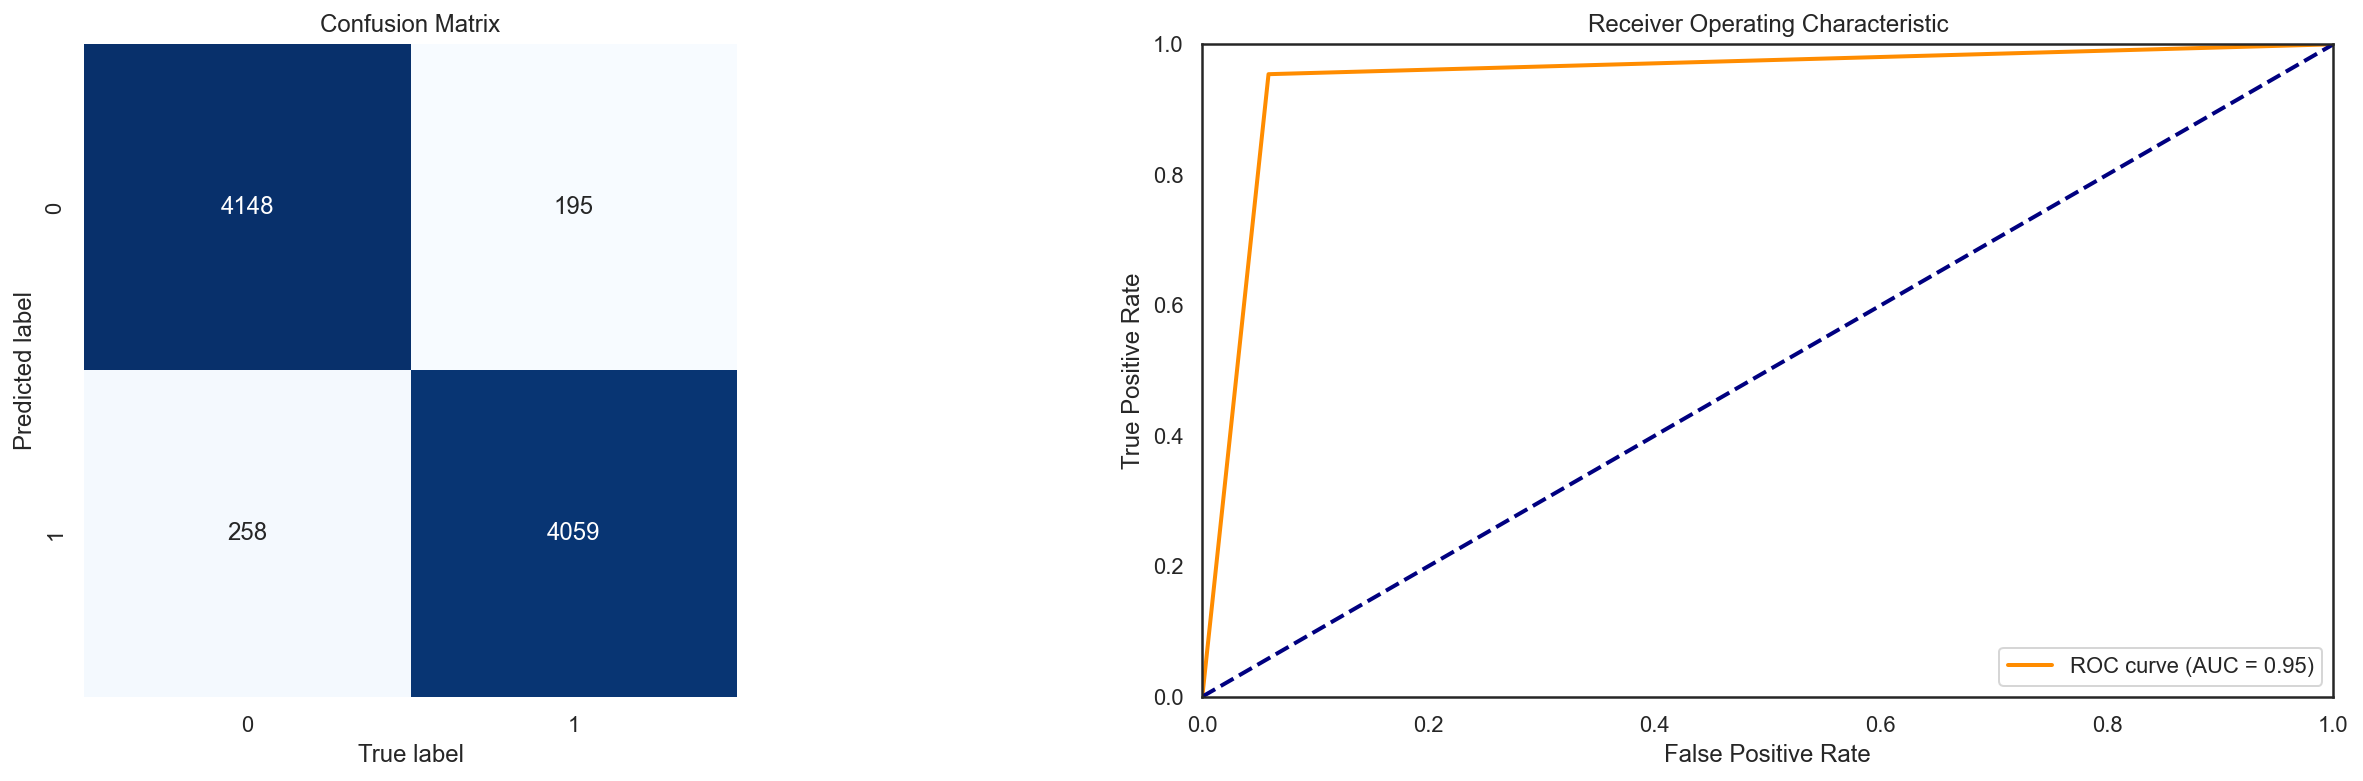

(0.9476905311778291, 0.940236275191105, 0.9541607898448519, 0.9478021380000473)

In [65]:
show_summary_report(model1, X_data = X_test, y_data=y_test)

The line above shows the confusion matrix for the random forest classifier model.

# Step 6. Create Inference of the Test Dataset for both models

Inference of the test dataset is essential because we need to ensure that our models work. We feed the test dataset into our SVM and Random Forest models. Finally, inference enables individuals to utilize our models, apply new datasets and modify our algorithms. 

# Exploratory Data Analysis for the test Dataset

Read the Store_test dataset.

In [66]:
Store_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


We rename columns of the test dataset.

In [67]:
Store_test = Store_test.rename(columns={"store_nbr":"Store_Number"})
Store_test = Store_test.rename(columns={"family":"Type_Of_Product"})
Store_test = Store_test.rename(columns={"sales":"Sales"})
Store_test = Store_test.rename(columns={"onpromotion":"On_Promotion"})

Convert Type_Of_Product (object) into categorical data.

In [68]:
Store_test.Type_Of_Product = pd.Categorical(Store_test.Type_Of_Product)

In [69]:
Store_test['Product_Type'] = Store_test.Type_Of_Product.cat.codes

In [70]:
#Again we convert categoriral data into numerical values for Prodcut_Type.
Store_test["Product_Type"] = pd.to_numeric(Store_test["Product_Type"])

Create Oil test dataset.

In [71]:
Oil_test = Oil.iloc[-11:]
Oil_test.head()

,date,Oil_Price
1207,2017-08-17,47.07
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45


In [72]:
#Merge the Oil_test and Store_test dataset together. 
#store_test is our new DataFrame.
store_test = pd.merge(Oil_test, Store_test, on = ('date'), how = 'left')

In [73]:
store_test = store_test.drop(['id','date','Type_Of_Product'], axis = 1)

In [74]:
store_test.isnull().sum()

Oil_Price       0
Store_Number    0
On_Promotion    0
Product_Type    0
dtype: int64

In [75]:
store_test.dropna(axis = 0, inplace = True)# We now remove all null values from our store_test dataset.

# Step 7. Apply test dataset into the models

# Forecast of Next Month's Sales per day

Support Vector Machine Inference.

In [76]:
prediction_SVM = svc_model.predict(store_test)
prediction_SVM[:30]

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.])

Random Forest Classifier Inference.

In [77]:
prediction_test_Random_Forest = model1.predict(store_test)
prediction_test_Random_Forest[:30]

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

# AUC curves for SVM and Random Forest models

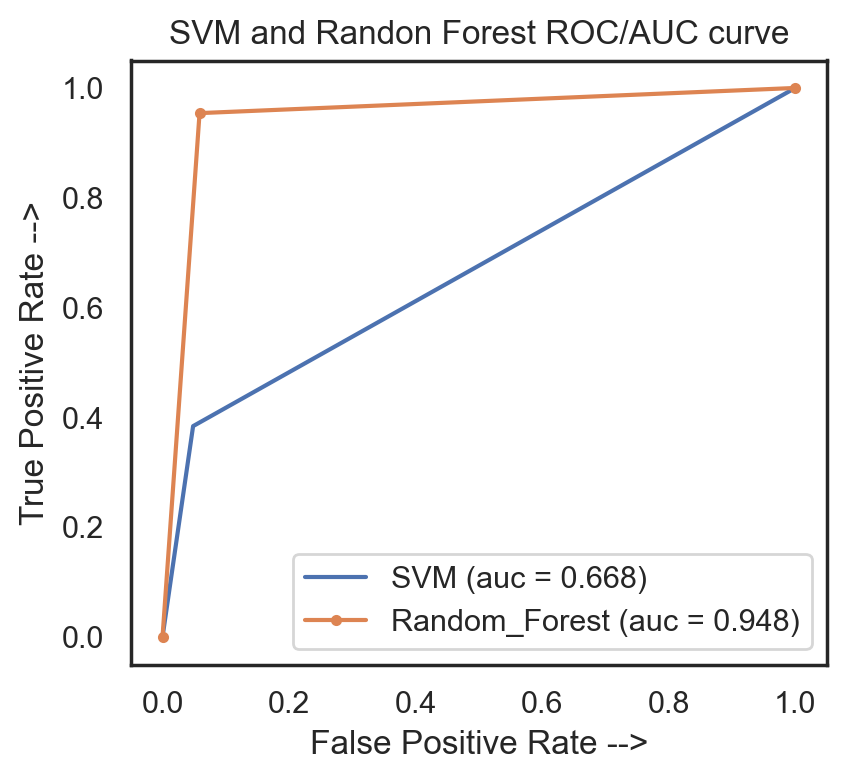

In [78]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

Random_Forest_fpr, Random_Forest_tpr, threshold = roc_curve(y_test, y_pred1)
auc_Random_Forest = auc(Random_Forest_fpr, Random_Forest_tpr)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(Random_Forest_fpr, Random_Forest_tpr, marker='.', label='Random_Forest (auc = %0.3f)' % auc_Random_Forest)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('SVM and Randon Forest ROC/AUC curve')
plt.legend()

plt.show()


# In Conclusion

The random forest classifier model achieved an accuracy rate id 94.7%. However, the random forest classifier showed over a 95% accuracy level when the training data showed overfitting. In conclusion, Corporación Favorita requires marketing expenditure through item promotion to increase the number of sales. However, marketing expense is not necessary when the oil price is high.

# Extras

# XGBoost model

In [79]:
#import libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [80]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [81]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [82]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.413189


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'The_Price_of_Oil')

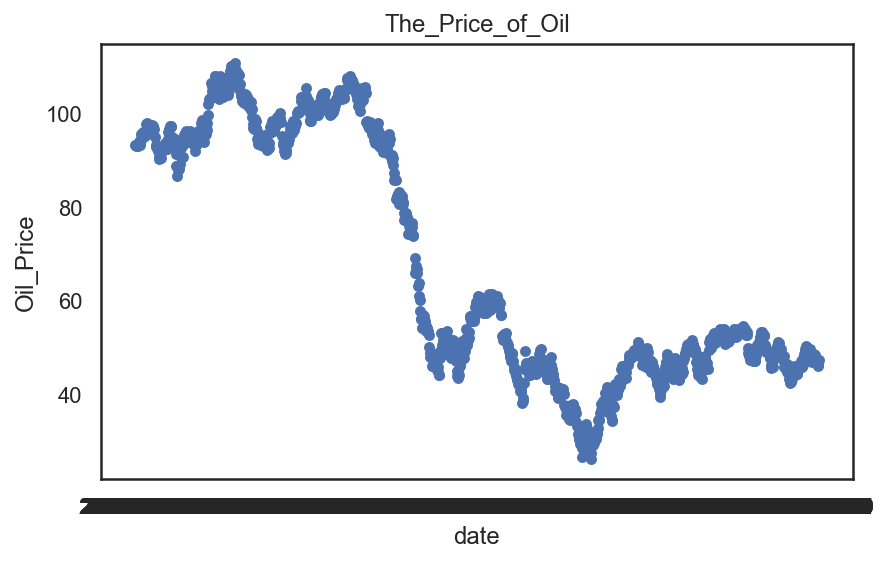

In [84]:
Oil.plot.scatter(x='date',y='Oil_Price', colormap='viridis')
plt.title('The_Price_of_Oil')

Histogram plots for Sales and Promotion

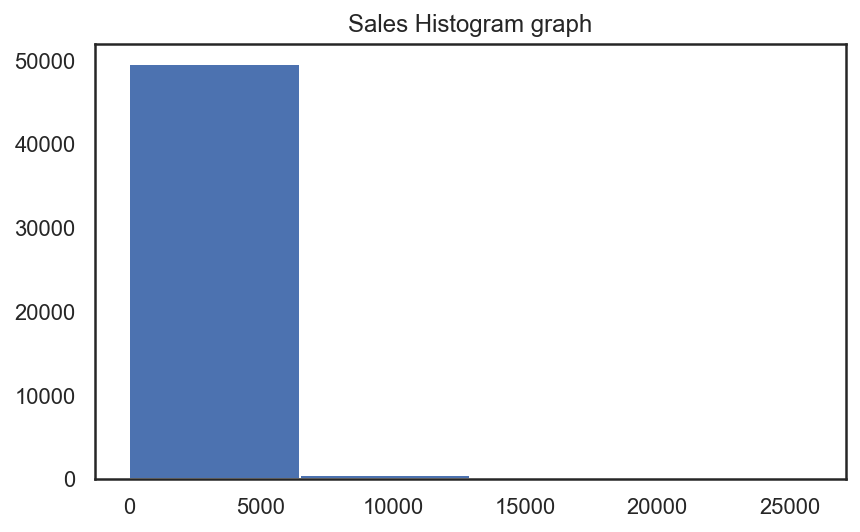

In [85]:
x = Store_train['Sales']
plt.hist(x, bins = 4)
plt.title('Sales Histogram graph')
plt.show()

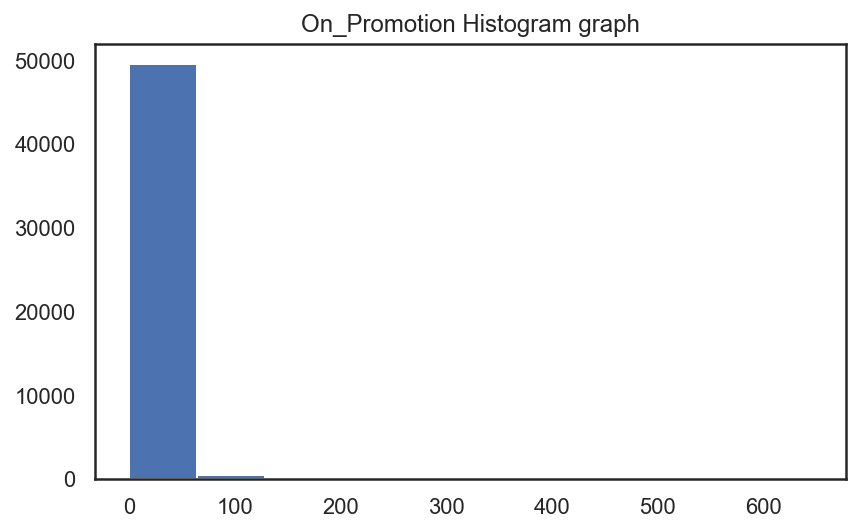

In [86]:
p = Store_train['On_Promotion']
plt.hist(p, bins = 10)
plt.title('On_Promotion Histogram graph')
plt.show()